In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
import os

path2data = "../data/"

if not os.path.exists(path2data):
    os.mkdir(path2data)

data_transformer = transforms.Compose([transforms.ToTensor()])
train_ds = datasets.STL10(path2data, split='train', download=True,
                          transform=data_transformer)
print(train_ds.data.shape)

Files already downloaded and verified
(5000, 3, 96, 96)


In [2]:
test_ds = datasets.STL10(path2data, split='test', download=True,
                         transform=data_transformer)
print(test_ds.data.shape)

Files already downloaded and verified
(8000, 3, 96, 96)


In [3]:
import numpy as np

meanRGB = [np.mean(x.numpy(), axis=(1, 2)) for x, _ in train_ds]
stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in train_ds]

meanR = np.mean([m[0] for m in meanRGB])
meanG = np.mean([m[1] for m in meanRGB])
meanB = np.mean([m[2] for m in meanRGB])

stdR = np.mean([s[0] for s in stdRGB])
stdG = np.mean([s[1] for s in stdRGB])
stdB = np.mean([s[2] for s in stdRGB])

print(meanR, meanG, meanB)
print(stdR, stdG, stdB)

0.4467106 0.43980986 0.40664646
0.22414584 0.22148906 0.22389975


In [4]:
train_transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(227),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB])
])

test_transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB]),
    transforms.Resize(227)
])

In [5]:
train_ds.transform = train_transformer
test_ds.transform = test_transformer

In [6]:
# sample image check
import torch
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg_tr)
    
    if y is not None:
        plt.title("labels: " + str(y))

np.random.seed(0)
torch.manual_seed(0)

rnd_inds = int(np.random.randint(0, len(train_ds), 1))
print(rnd_inds)
img, label = train_ds[rnd_inds]
print(rnd_inds)

2732
2732


c:\Users\dksdu\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


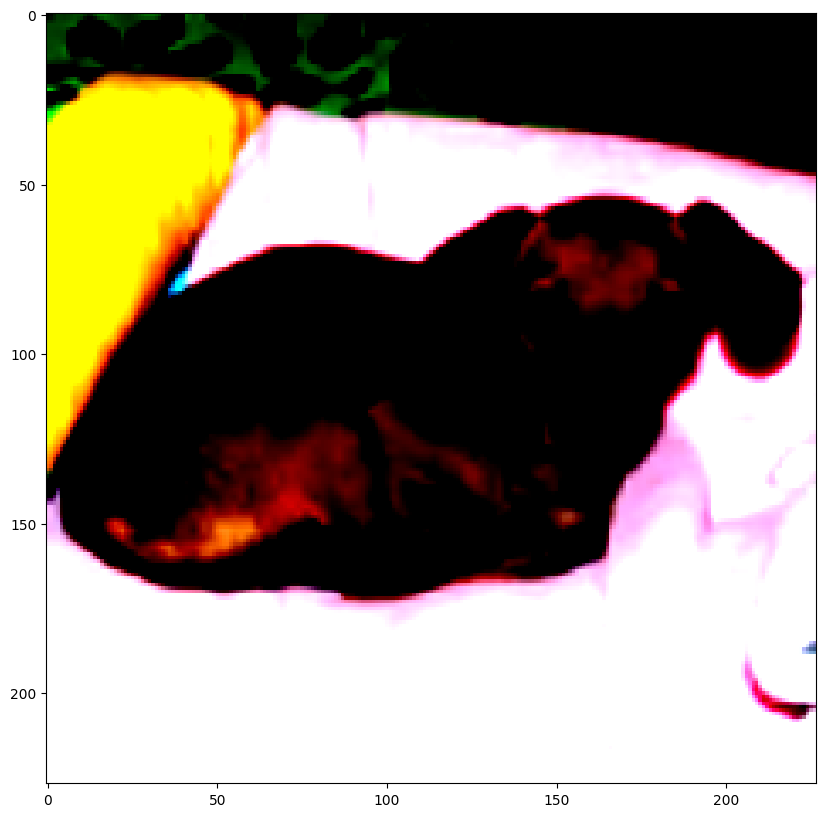

In [7]:
plt.figure(figsize=(10, 10))
show(img)

In [8]:
import collections
y_train = [y for _, y in train_ds]
counter_train = collections.Counter(y_train)
print(counter_train)

Counter({1: 500, 5: 500, 6: 500, 3: 500, 9: 500, 7: 500, 4: 500, 8: 500, 0: 500, 2: 500})


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices = list(range(len(test_ds)))
y_test = [y for _,y in test_ds]
for test_index, val_index in sss.split(indices, y_test):
    print('test : ', len(test_index), ' val: ', len(val_index))

c:\Users\dksdu\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


test :  6400  val:  1600


In [11]:
from torch.utils.data import Subset
val_ds = Subset(test_ds, val_index)
test_ds = Subset(test_ds, test_index)

In [12]:
import numpy as np

y_text = [y for _, y in test_ds]
y_val = [y for _, y in val_ds]

counter_test = collections.Counter(y_test)
counter_val = collections.Counter(y_val)
print(counter_test)
print(counter_val)

c:\Users\dksdu\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Counter({6: 800, 7: 800, 5: 800, 0: 800, 3: 800, 1: 800, 4: 800, 9: 800, 2: 800, 8: 800})
Counter({2: 160, 8: 160, 3: 160, 6: 160, 4: 160, 1: 160, 5: 160, 9: 160, 0: 160, 7: 160})


In [13]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)

for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

for x, y in val_dl:
    print(x.shape)
    print(y.shape)
    break

c:\Users\dksdu\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([32, 3, 227, 227])
torch.Size([32])
torch.Size([32, 3, 227, 227])
torch.Size([32])


In [14]:
# 모델 정의
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [34]:
import torch.nn as nn
import torch.nn.functional as F

class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet,self).__init__()
        # input size : (b x 3 x 227 x 227)
        # 논문에는 image 크기가 224 pixel이라고 나와 있지만, 오타입니다.
        # 227x227을 사용합니다.

        # Conv layer
        self.net = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0), # (b x 96 x 55 x 55)
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2), # (b x 96 x 27 x 27)

            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2), # (b x 256 x 27 x 27)
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2), # (b x 256 x 13 x 13)

            nn.Conv2d(256, 384, 3, 1, 1), # (b x 384 x 13 x 13)
            nn.ReLU(),

            nn.Conv2d(384, 384, 3, 1, 1), # (b x 384 x 13 x 13)
            nn.ReLU(),

            nn.Conv2d(384, 256, 3, 1, 1), # (b x 256 x 13 x 13)
            nn.ReLU(),
            nn.MaxPool2d(3, 2), # (b x 256 x 6 x 6)
        )

        # fc layer
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(in_features=(256 * 6 * 6), out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=num_classes),
        )

        # weight initialization
        self.init_weight()

    # define weight initialization function
    def init_weight(self):
        for layer in self.net:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weight, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        # in paper, initialize bias to 1 for conv2, 4, 5 layer
        nn.init.constant_(self.net[4].bias, 1)
        nn.init.constant_(self.net[10].bias, 1)
        nn.init.constant_(self.net[12].bias, 1)
    
    def forward(self,x):
        x = self.net(x)
        x = x.view(-1, 256 * 6* 6)
        x = self.classifier(x)
        return x

In [35]:
model = AlexNet().to(device)
print(model)

AlexNet(
  (net): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=True)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


In [36]:
from torchsummary import summary
summary(model, input_size=(3, 227, 227), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
 LocalResponseNorm-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
              ReLU-6          [-1, 256, 27, 27]               0
 LocalResponseNorm-7          [-1, 256, 27, 27]               0
         MaxPool2d-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 384, 13, 13]       1,327,488
             ReLU-12          [-1, 384, 13, 13]               0
           Conv2d-13          [-1, 256, 13, 13]         884,992
             ReLU-14          [-1, 256,

In [37]:
for p in model.parameters():
    print(p)
    break

Parameter containing:
tensor([[[[-1.6439e-02, -1.9875e-02,  5.7595e-03,  ..., -1.4525e-02,
           -1.3700e-02,  1.6887e-02],
          [-7.2912e-03,  1.5200e-02,  1.0598e-02,  ..., -5.0565e-03,
            1.2693e-02,  2.3521e-03],
          [-1.5937e-02, -2.7047e-03,  2.1658e-03,  ..., -9.5293e-03,
            8.8056e-03,  5.2272e-04],
          ...,
          [ 2.8551e-03,  3.5795e-04,  4.3755e-03,  ...,  7.4864e-03,
            1.2890e-02, -3.6801e-03],
          [-1.3450e-02, -1.5228e-03,  1.3109e-02,  ..., -1.6654e-02,
           -8.2068e-03, -1.5607e-02],
          [ 1.1001e-02,  3.0767e-03,  1.2683e-02,  ..., -8.5822e-03,
           -2.1119e-02, -2.9247e-02]],

         [[-8.5966e-04, -5.8700e-03,  2.2134e-02,  ...,  1.0209e-02,
            1.2126e-02,  9.4148e-03],
          [ 9.3710e-04, -1.3102e-02, -1.4073e-02,  ...,  3.5535e-03,
            6.4296e-04, -2.3423e-02],
          [-3.9611e-03, -7.1720e-03, -1.6735e-03,  ...,  3.9193e-03,
           -1.0572e-02,  6.4993e-03]

In [38]:
loss_func = nn.CrossEntropyLoss(reduction='sum')

from torch import optim
opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)

def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']


In [39]:
from torch.optim.lr_scheduler import StepLR
lr_scheduler = optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)

In [40]:
def metrics_batch(output, target):
    pred = output.argmax(dim=1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

In [41]:
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    
    metric_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [42]:
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0
    running_metric = 0
    len_data = len(dataset_dl.dataset)
    
    for xb, yb in dataset_dl:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)
        
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        
        if metric_b is not None:
            running_metric += metric_b
        
        if sanity_check is True:
            break
        
    loss = running_loss / float(len_data)
    metric = running_metric / float(len_data)
    return loss, metric

In [43]:
import time
import copy

def train_val(model, params):
    # extract model parameters
    num_epochs = params['num_epochs']
    loss_func = params['loss_func']
    opt = params['optimizer']
    train_dl = params['train_dl']
    val_dl = params['val_dl']
    sanity_check = params['sanity_check']
    lr_scheduler = params['lr_scheduler']
    path2weights = params['path2weights']

    # keep a history of the loss and the metric value
    loss_history = {
        'train': [],
        'val': [],
    }

    metric_history = {
        'train': [],
        'val': [],
    }

    # save the best perfirming model
    best_model_wts = copy.deepcopy(model.state_dict())

    # initializer the best loss to an infinite value
    best_loss = float('inf')

    for epoch in range(num_epochs):
        start_time = time.time()

        # get current learning rate
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        # train model on trainin dataset
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)

        # collect loss and metric for the training dataset
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        # evaluate model on validation dataset
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        
        # store the best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print('Copied best model weights')

        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)

        # update the learning rate
        lr_scheduler.step()
        if current_lr != get_lr(opt):
            print('Loading best model weights!')
            model.load_state_dict(best_model_wts)

        # print the loss and accuracy values and return the trained model
        print('train loss: %.6f, dev loss: %.6f, accuracy: %.2f, time: %.4f s' %(train_loss, val_loss, 100*val_metric, time.time()-start_time))
        print('-'*10)

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

# define the training parameters
params_train = {
    'num_epochs':3,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':True,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./models/weights.pt',
}

# check the directory to save weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

# train model
# sanity_check를 True로 설정하여, 학습이 되는지 확인해봅니다.
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/2, current lr=0.001


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [32, 4096]], which is output 0 of ReluBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).